# Preliminary Wrangling

This document explores a dataset containing 519700 rows and 15 columns of BikeSharing in BayArea

In [204]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lyft-bay-wheels-ride-data/201910-baywheels-tripdata.csv
/kaggle/input/lyft-bay-wheels-ride-data/201807-fordgobike-tripdata.csv
/kaggle/input/lyft-bay-wheels-ride-data/201806-fordgobike-tripdata.csv
/kaggle/input/lyft-bay-wheels-ride-data/201810-fordgobike-tripdata.csv
/kaggle/input/lyft-bay-wheels-ride-data/201811-fordgobike-tripdata.csv
/kaggle/input/lyft-bay-wheels-ride-data/201902-fordgobike-tripdata.csv
/kaggle/input/lyft-bay-wheels-ride-data/201907-baywheels-tripdata.csv
/kaggle/input/lyft-bay-wheels-ride-data/201809-fordgobike-tripdata.csv
/kaggle/input/lyft-bay-wheels-ride-data/201812-fordgobike-tripdata.csv
/kaggle/input/lyft-bay-wheels-ride-data/2017-fordgobike-tripdata.csv
/kaggle/input/lyft-bay-wheels-ride-data/201901-fordgobike-tripdata.csv
/kaggle/input/lyft-bay-wheels-ride-data/201804-fordgobike-tripdata.csv
/kaggle/input/lyft-bay-wheels-ride-data/201908-baywheels-tripdata.csv
/kaggle/input/lyft-bay-wheels-ride-data/201904-fordgobike-tripdata.csv
/kaggle/inp

# Gathering Data

In [205]:
## load in the dataset into a pandas dataframe, print statistics
data  = pd.read_csv('/kaggle/input/lyft-bay-wheels-ride-data/2017-fordgobike-tripdata.csv')

# Assessing Data

In [206]:
#executing top 5 rows
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [207]:
#execting bottom 5 rows
data.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
519695,435,2017-06-28 10:00:54.5280,2017-06-28 10:08:10.4380,81,Berry St at 4th St,37.775880,-122.393170,45,5th St at Howard St,37.781752,-122.405127,400,Subscriber,1991.0,Male
519696,431,2017-06-28 09:56:39.6310,2017-06-28 10:03:51.0900,66,3rd St at Townsend St,37.778742,-122.392741,321,5th at Folsom,37.780146,-122.403071,316,Subscriber,1973.0,Male
519697,424,2017-06-28 09:47:36.3470,2017-06-28 09:54:41.1870,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,48,2nd St at S Park St,37.782411,-122.392706,240,Subscriber,1985.0,Female
519698,366,2017-06-28 09:47:41.6640,2017-06-28 09:53:47.7150,58,Market St at 10th St,37.776619,-122.417385,59,S Van Ness Ave at Market St,37.774814,-122.418954,669,Subscriber,1981.0,Male
519699,188,2017-06-28 09:49:46.3770,2017-06-28 09:52:55.3380,25,Howard St at 2nd St,37.787522,-122.397405,48,2nd St at S Park St,37.782411,-122.392706,117,Subscriber,1984.0,Male


In [208]:
## high-level overview of data shape and composition
print(data.shape)
print(data.dtypes)

(519700, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object


**We understand that there are 519700 rows in the dataset and we observe there are some missing values in member year of birth and gender**

In [209]:
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


Upon describing the data we can see that minimum second value is 60 seconds and hence we can convert it into minutes. Also,we need to check more about the year of birth as 1886 is practically impossible.

In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
 13  member_birth_year        453159 non-null  float64
 14  memb

In [211]:
data.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

In [212]:
data['member_gender'].unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [213]:
data['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [214]:
# change the trip duration from seconds to minutes
data['duration_min'] = round(data['duration_sec']/60)

In [215]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,duration_min
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,1335.0
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female,1313.0
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN,763.0
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN,1036.0
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female,727.0



# Assessing,Cleaning and Reshaping of Data

In [216]:
#extract the value of start hour and end hour from start_time
data['start_hour']= pd.DatetimeIndex(data['start_time']).hour
print(data['start_hour'])

0         16
1         15
2         22
3         17
4         14
          ..
519695    10
519696     9
519697     9
519698     9
519699     9
Name: start_hour, Length: 519700, dtype: int64


In [217]:
data['end_hour']= pd.DatetimeIndex(data['end_time']).hour
print(data['end_hour'])

0         15
1         13
2         11
3         10
4          2
          ..
519695    10
519696    10
519697     9
519698     9
519699     9
Name: end_hour, Length: 519700, dtype: int64


In [218]:
#normalize start time and end time
data['start_date']= pd.DatetimeIndex(data['start_time']).normalize()
print(data['start_date'])

0        2017-12-31
1        2017-12-31
2        2017-12-31
3        2017-12-31
4        2017-12-31
            ...    
519695   2017-06-28
519696   2017-06-28
519697   2017-06-28
519698   2017-06-28
519699   2017-06-28
Name: start_date, Length: 519700, dtype: datetime64[ns]


In [219]:
data['end_date']= pd.DatetimeIndex(data['end_time']).normalize()
print(data['end_date'])

0        2018-01-01
1        2018-01-01
2        2018-01-01
3        2018-01-01
4        2018-01-01
            ...    
519695   2017-06-28
519696   2017-06-28
519697   2017-06-28
519698   2017-06-28
519699   2017-06-28
Name: end_date, Length: 519700, dtype: datetime64[ns]


In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  object        
 2   end_time                 519700 non-null  object        
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [221]:
#extract days of the week from time
data['start_day_of_week'] = data.start_date.dt.day_name()
data['end_day_of_week'] = data.end_date.dt.day_name()
print(data.start_day_of_week)
print(data.end_day_of_week)

0            Sunday
1            Sunday
2            Sunday
3            Sunday
4            Sunday
            ...    
519695    Wednesday
519696    Wednesday
519697    Wednesday
519698    Wednesday
519699    Wednesday
Name: start_day_of_week, Length: 519700, dtype: object
0            Monday
1            Monday
2            Monday
3            Monday
4            Monday
            ...    
519695    Wednesday
519696    Wednesday
519697    Wednesday
519698    Wednesday
519699    Wednesday
Name: end_day_of_week, Length: 519700, dtype: object


In [222]:
# to get month name value from month number
data['start_month'] = data['start_date'].dt.month
data['start_month'] = data['start_month'].apply(lambda x: calendar.month_abbr[x])
print(data['start_month'])

0         Dec
1         Dec
2         Dec
3         Dec
4         Dec
         ... 
519695    Jun
519696    Jun
519697    Jun
519698    Jun
519699    Jun
Name: start_month, Length: 519700, dtype: object


In [223]:
#extact age of the rider using birth year column
now = datetime.now()
data['person_age'] = now.year - data['member_birth_year']
data['person_age'] = data.person_age.fillna(0.0).astype(int)
data['person_age'].isnull().sum()

0

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  object        
 2   end_time                 519700 non-null  object        
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [225]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,duration_min,start_hour,end_hour,start_date,end_date,start_day_of_week,end_day_of_week,start_month,person_age
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Male,1335.0,16,15,2017-12-31,2018-01-01,Sunday,Monday,Dec,33
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,...,Female,1313.0,15,13,2017-12-31,2018-01-01,Sunday,Monday,Dec,55
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,...,NaN,763.0,22,11,2017-12-31,2018-01-01,Sunday,Monday,Dec,0
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,...,NaN,1036.0,17,10,2017-12-31,2018-01-01,Sunday,Monday,Dec,0
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,...,Female,727.0,14,2,2017-12-31,2018-01-01,Sunday,Monday,Dec,23


In [226]:
#delete columns which are no longer required
delete_columns = ['duration_sec', 'start_time','end_time','start_station_latitude','start_station_longitude','start_station_id',
                  'end_station_id','end_station_latitude','end_station_longitude','member_birth_year','bike_id']
data.drop(delete_columns, axis=1, inplace = True)

In [227]:
data['start_month'].unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun'], dtype=object)

In [228]:
# convert into ordered categorical types

ordinal_var_dict = {'start_day_of_week': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                    'end_day_of_week': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                   'user_type': ['Customer','Subscriber'],
                   'member_gender' :['Male','Female'],
                   'start_month':['Jun','Jul','Aug','Sep','Oct','Nov','Dec']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    data[var] = data[var].astype(ordered_var)

In [229]:
data.head()

,start_station_name,end_station_name,user_type,member_gender,duration_min,start_hour,end_hour,start_date,end_date,start_day_of_week,end_day_of_week,start_month,person_age
0,Laguna St at Hayes St,San Francisco Public Library (Grove St at Hyde...,Customer,Male,1335.0,16,15,2017-12-31,2018-01-01,Sunday,Monday,Dec,33
1,Yerba Buena Center for the Arts (Howard St at ...,Dolores St at 15th St,Customer,Female,1313.0,15,13,2017-12-31,2018-01-01,Sunday,Monday,Dec,55
2,Downtown Berkeley BART,Downtown Berkeley BART,Customer,NaN,763.0,22,11,2017-12-31,2018-01-01,Sunday,Monday,Dec,0
3,8th St at Ringold St,Powell St BART Station (Market St at 5th St),Customer,NaN,1036.0,17,10,2017-12-31,2018-01-01,Sunday,Monday,Dec,0
4,Bancroft Way at Telegraph Ave,Fulton St at Bancroft Way,Subscriber,Female,727.0,14,2,2017-12-31,2018-01-01,Sunday,Monday,Dec,23


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

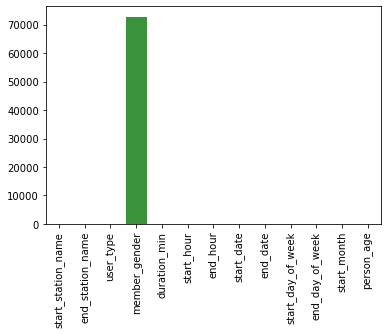

In [230]:
#Visually check null values in columns
null_counts = data.isnull().sum()
base_color = sns.color_palette()[2]
sns.barplot(null_counts.index.values, null_counts, color = base_color)
plt.xticks(rotation=90)

In [231]:
data_duplicate = data[data.duplicated()]
print(data_duplicate)

                                       start_station_name  \
13      San Francisco Caltrain Station 2  (Townsend St...   
24                                  3rd St at Townsend St   
25                                  3rd St at Townsend St   
30                          The Embarcadero at Sansome St   
44                                  3rd St at Townsend St   
...                                                   ...   
519419                              3rd St at Townsend St   
519420                              3rd St at Townsend St   
519437                2nd St at Townsend St - Coming Soon   
519581                      The Embarcadero at Steuart St   
519582                      The Embarcadero at Steuart St   

                                         end_station_name   user_type  \
13                                  Spear St at Folsom St  Subscriber   
24                          The Embarcadero at Steuart St    Customer   
25                          The Embarcadero at S

In [232]:
#drop duplicates values
data.drop_duplicates(inplace = True)
data.shape

(507829, 13)

In [233]:

#drop null values from the dataset
data.dropna(inplace=True)
data.shape

(445948, 13)

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 445948 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   start_station_name  445948 non-null  object        
 1   end_station_name    445948 non-null  object        
 2   user_type           445948 non-null  category      
 3   member_gender       445948 non-null  category      
 4   duration_min        445948 non-null  float64       
 5   start_hour          445948 non-null  int64         
 6   end_hour            445948 non-null  int64         
 7   start_date          445948 non-null  datetime64[ns]
 8   end_date            445948 non-null  datetime64[ns]
 9   start_day_of_week   445948 non-null  category      
 10  end_day_of_week     445948 non-null  category      
 11  start_month         445948 non-null  category      
 12  person_age          445948 non-null  int64         
dtypes: category(5), datetime64[ns

**Grouping time of the day as -Early Morning; Morning Peak ; Afternoon ; Evening Peak ; Night**

In [235]:
bins = [0,7,10,16,19,23]
labels = ['Early Morning', 'Morning Peak', 'Afternoon',' Evening Peak','Night']
data['time_of_day'] = pd.cut(data['start_hour'],bins=bins, labels= labels, include_lowest = True)
data.head()

,start_station_name,end_station_name,user_type,member_gender,duration_min,start_hour,end_hour,start_date,end_date,start_day_of_week,end_day_of_week,start_month,person_age,time_of_day
0,Laguna St at Hayes St,San Francisco Public Library (Grove St at Hyde...,Customer,Male,1335.0,16,15,2017-12-31,2018-01-01,Sunday,Monday,Dec,33,Afternoon
1,Yerba Buena Center for the Arts (Howard St at ...,Dolores St at 15th St,Customer,Female,1313.0,15,13,2017-12-31,2018-01-01,Sunday,Monday,Dec,55,Afternoon
4,Bancroft Way at Telegraph Ave,Fulton St at Bancroft Way,Subscriber,Female,727.0,14,2,2017-12-31,2018-01-01,Sunday,Monday,Dec,23,Afternoon
6,Addison St at Fourth St,Addison St at Fourth St,Customer,Female,75.0,23,1,2017-12-31,2018-01-01,Sunday,Monday,Dec,29,Night
12,San Francisco Caltrain Station 2 (Townsend St...,Spear St at Folsom St,Subscriber,Male,36.0,23,0,2017-12-31,2018-01-01,Sunday,Monday,Dec,30,Night


# Exploratory Analysis - Univariate Exploration of Data

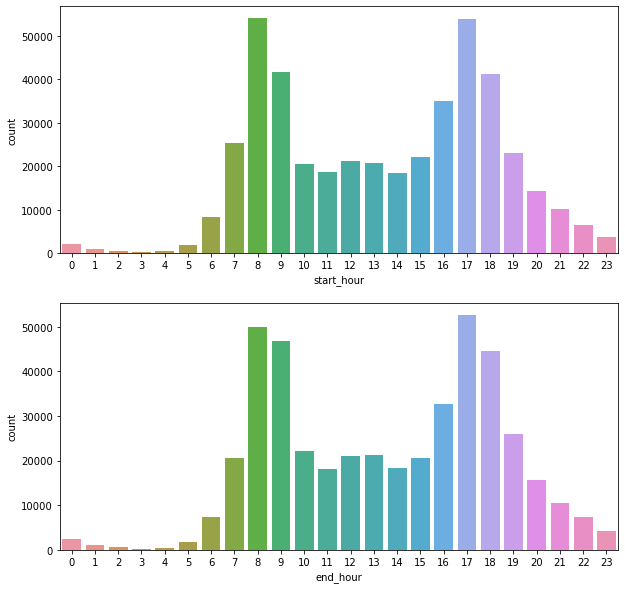

In [236]:
#Number of trips during each hour of day

fig, ax = plt.subplots(nrows=2, figsize=[10,10])

sns.countplot(data = data, x='start_hour', ax=ax[0])
sns.countplot(data = data, x='end_hour',ax=ax[1])
plt.show()

The above explanoratory data clearly shows the peak hours of the day is 7-9 AM and 4-6 PM. Least number of cycles are rented during 12 AM to 5 AM.

**Visualising Age of the Rider**

Text(0.5, 0, 'Age of the Rider')

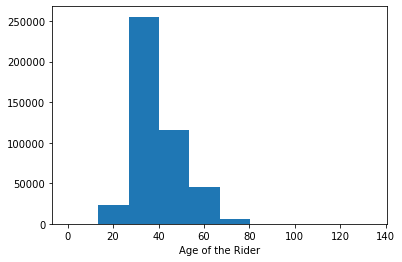

In [237]:
plt.hist(data = data, x='person_age')
plt.xlabel('Age of the Rider')

**Graph between number of customers and subscribers**

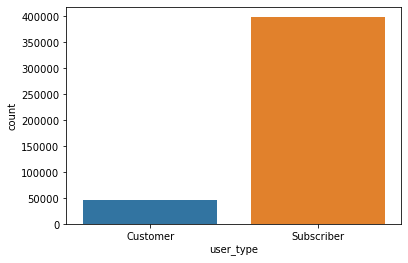

In [238]:
sns.countplot(data=data, x='user_type')

The above graph shows the comparison between number of Customers and Subscribers of Ford Bike Data.We can clearly see from the graph that here subscribers are more than customers for the dataset we have.

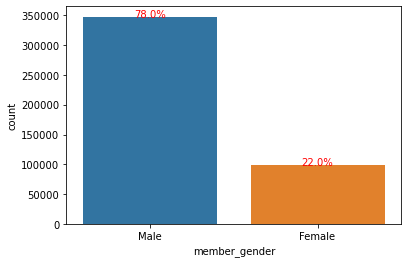

In [239]:
#Let's create the plot for member_gender to check the relationship between them

sns.countplot(data=data, x='member_gender')

# add annotations

n_points = data.shape[0]
cat_counts = data['member_gender'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(round(100*count/n_points))

    # print the annotation just below the top of the bar
    plt.text(loc, count, pct_string, ha = 'center', color = 'r')

The above graph shows the comparison between number of bikes rented by Males versus Female. We have more males than females in the dataset with 78% Males and 22% Females.

****Number of bikes usage per weekday****

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

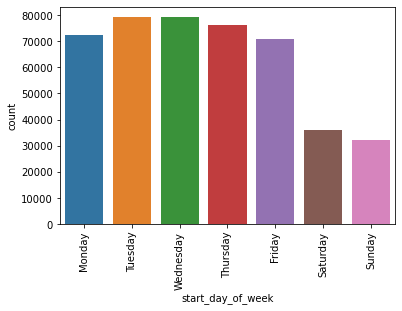

In [240]:
sns.countplot(data=data, x='start_day_of_week')
plt.xticks(rotation = 90)

The above graph is showing the bike usage and the highest number of bikes are used on weekdays rather than on weekend.

**Top 10 busy stations for bike pickup**

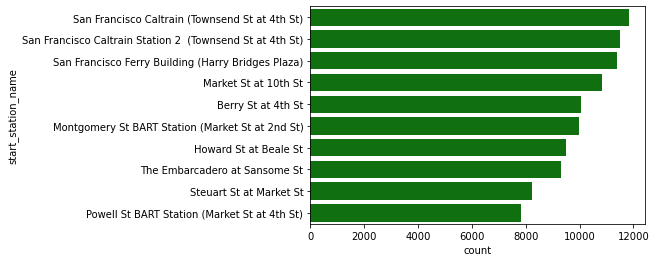

In [241]:
start_station_name = data['start_station_name'].value_counts()[:10].index
sns.countplot(data=data,y='start_station_name', color='g',order = start_station_name)

# Bivariate Exploration - Bike Usage based on Weekday and Gender

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

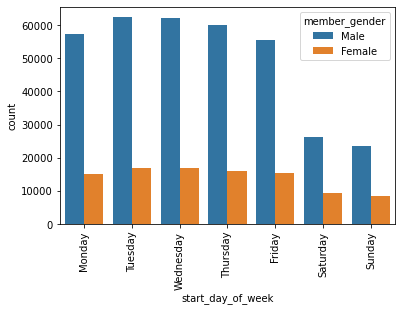

In [242]:
sns.countplot(data=data, x='start_day_of_week', hue ='member_gender')
plt.xticks(rotation=90)

Bike Usage based on Weekday and Gender clearly shows that more number of males ride the bike than females and also number of bikes are used more on a weekday than on a weekend.

**Gender vs Month Bike Usage**

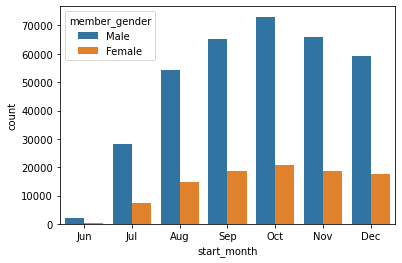

In [243]:
sns.countplot(data=data, x='start_month', hue='member_gender')

**Correlation Plot between Numeric Variables**

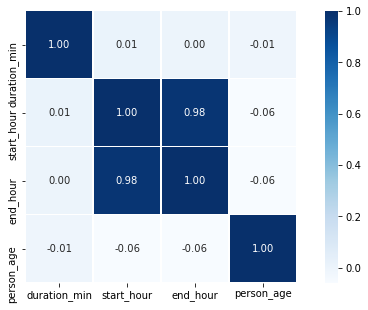

In [244]:
# correlation plot
plt.figure(figsize=[10,5])
sns.heatmap(data.corr(), cmap='Blues',linewidth=0.3,square=True, annot=True, fmt=".2f" )
plt.show()

**Comparison of Gender with user Type**

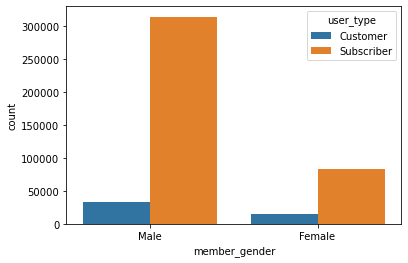

In [245]:
sns.countplot(data = data, x = 'member_gender', hue = 'user_type')

**Below Graph showing what time of the Day is most busy and which is least**

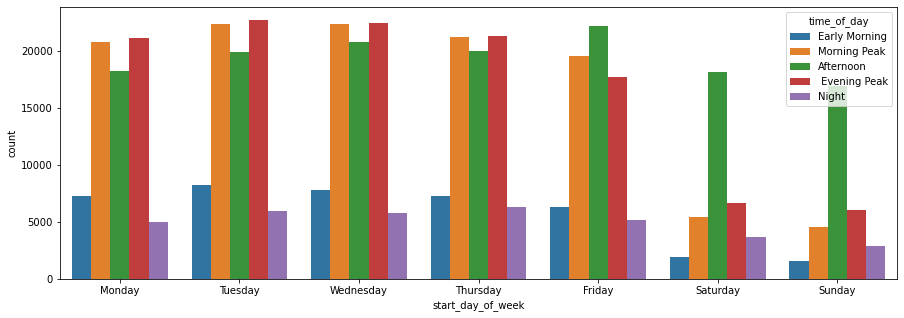

In [246]:
plt.figure(figsize=[15,5])
sns.countplot(data = data, x = 'start_day_of_week', hue = 'time_of_day')
plt.show()

The above graph clearly shows that weekdays are more busy than weekends and graph shows the peak hours of the day.

**Box Plot showing age of rider on weekday.**

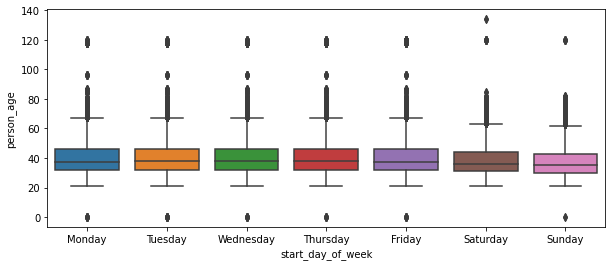

In [247]:
plt.figure(figsize=[10,4])
sns.boxplot(data = data, x = 'start_day_of_week', y = 'person_age')

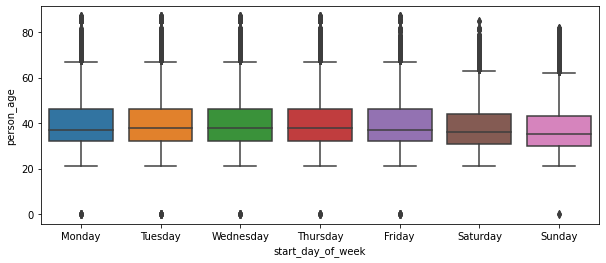

In [248]:
data = data[data['person_age'] < 90]
plt.figure(figsize=[10,4])
sns.boxplot(data = data, x = 'start_day_of_week', y = 'person_age')

Looks like there are many outliers in the age . Hence, I am considering only those riders who are under the age of 90.

# Multivariate Exploration of Data

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


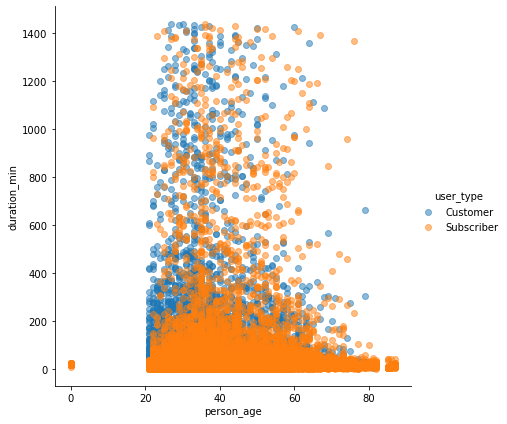

In [249]:
g = sns.FacetGrid(data = data, hue = 'user_type', size = 6)
g.map(plt.scatter, 'person_age','duration_min',alpha=0.5)
y_ticks = [400, 800,1200, 1600, 2000, 2400]
x_ticks = [20,30,40,50,60,70,80]
g.add_legend()

**Multivariate graph between time of day, gender and age of the rider**

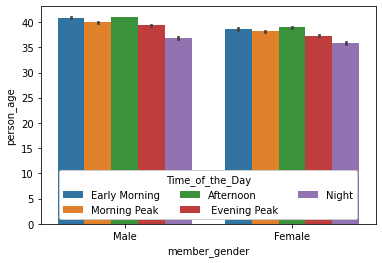

In [250]:
ax = sns.barplot(data = data, x = 'member_gender', y = 'person_age', hue = 'time_of_day')
ax.legend(loc =8, ncol = 3, framealpha = 1, title = 'Time_of_the_Day')